In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv('data_set.csv')
df.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41762 entries, 0 to 41761
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VDRL_RESULT        41762 non-null  float64
 1   CONS_ALCOHOL       41762 non-null  float64
 2   RH_FACTOR          41762 non-null  float64
 3   SMOKER             41762 non-null  float64
 4   PLAN_PREGNANCY     41762 non-null  float64
 5   BLOOD_GROUP        41762 non-null  float64
 6   HAS_PREG_RISK      41762 non-null  float64
 7   TET_VACCINE        41762 non-null  float64
 8   IS_HEAD_FAMILY     41762 non-null  float64
 9   MARITAL_STATUS     41762 non-null  float64
 10  FOOD_INSECURITY    41762 non-null  float64
 11  NUM_ABORTIONS      41762 non-null  float64
 12  NUM_LIV_CHILDREN   41762 non-null  float64
 13  NUM_PREGNANCIES    41762 non-null  float64
 14  FAM_PLANNING       41762 non-null  float64
 15  TYPE_HOUSE         41762 non-null  float64
 16  HAS_FAM_INCOME     417

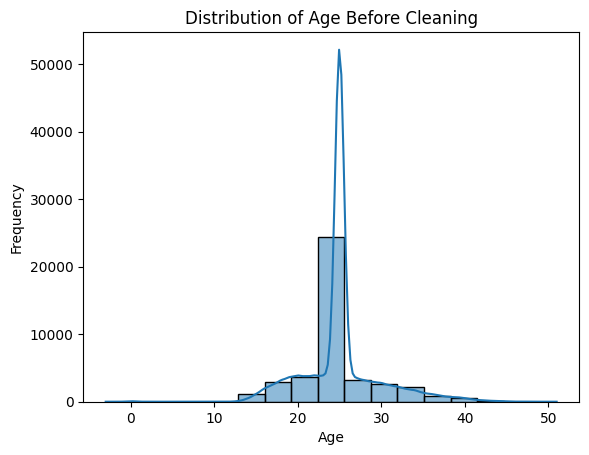

In [4]:
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age Before Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
df = df[(df['AGE'] >= 10) & (df['AGE'] <= 50)]
negative_ages = df[df['AGE'] < 0]
print(f"Number of negative ages: {negative_ages.shape[0]}")

Number of negative ages: 0


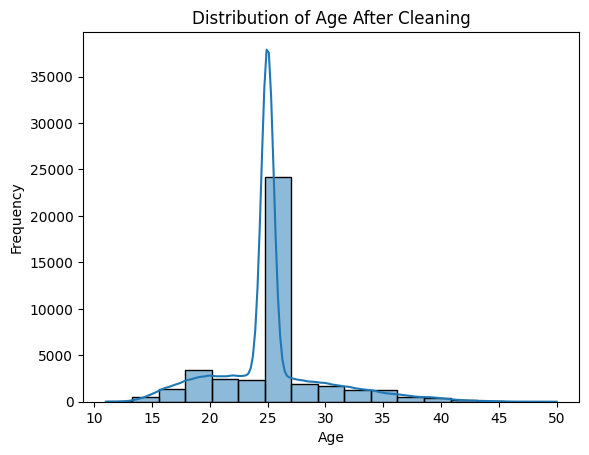

In [6]:
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age After Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
categorical_columns = [
    'CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY',
    'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS',
    'FOOD_INSECURITY', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING',
    'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'HOUSING_STATUS', 'WATER_TREATMENT'
]

numerical_columns = [
    'NUM_ABORTIONS', 'NUM_LIV_CHILDREN', 'NUM_PREGNANCIES',
    'NUM_RES_HOUSEHOLD', 'FAM_INCOME', 'AGE'
]


In [8]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

df['VDRL_RESULT'] = df['VDRL_RESULT'].astype('int')

missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64


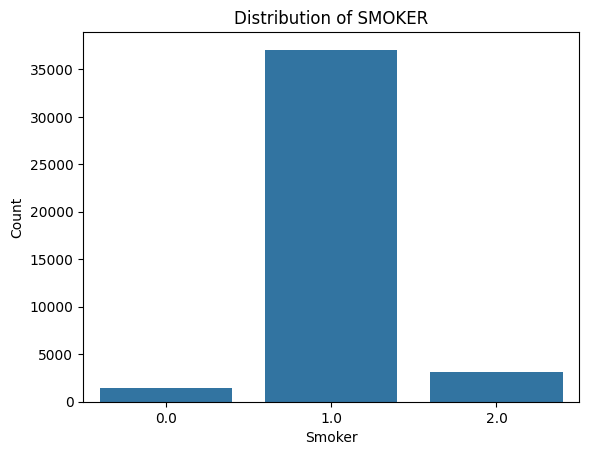

In [9]:
sns.countplot(x='SMOKER', data=df)
plt.title('Distribution of SMOKER')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

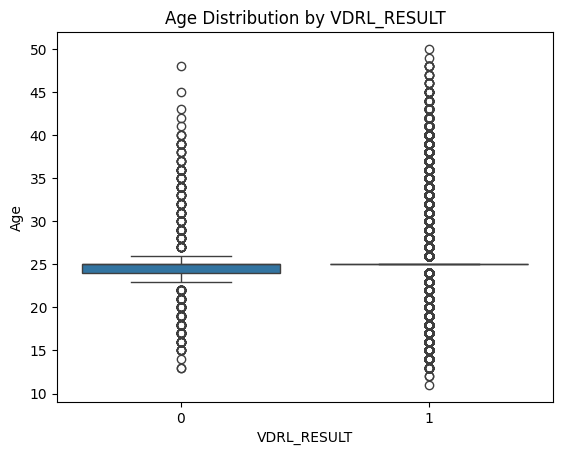

In [10]:
sns.boxplot(x='VDRL_RESULT', y='AGE', data=df)
plt.title('Age Distribution by VDRL_RESULT')
plt.xlabel('VDRL_RESULT')
plt.ylabel('Age')
plt.show()

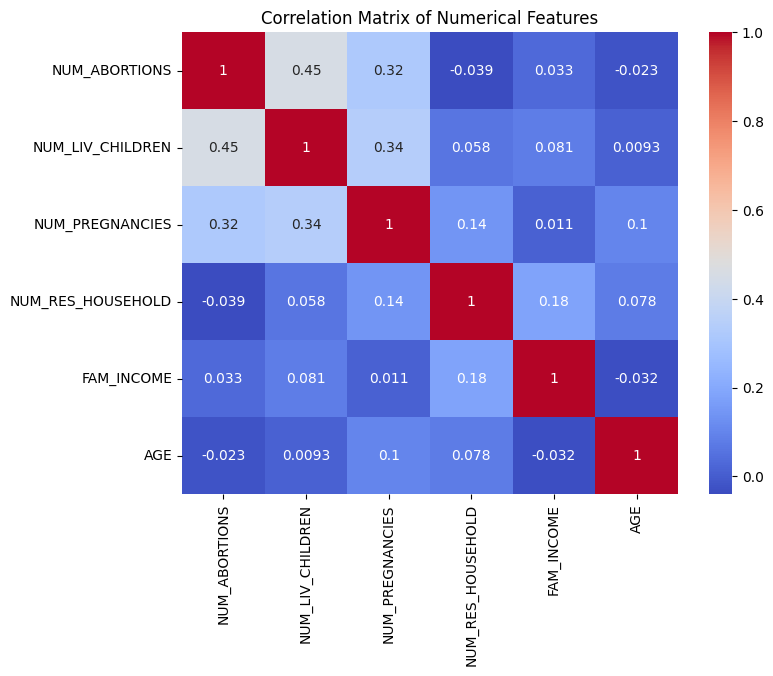

In [11]:
corr_matrix_num = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_num, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [13]:
X = df_encoded.drop('VDRL_RESULT', axis=1)
y = df_encoded['VDRL_RESULT']

In [14]:
print('Class distribution before balancing:')
print(y.value_counts())

Class distribution before balancing:
VDRL_RESULT
1    40893
0      825
Name: count, dtype: int64


In [15]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

C:\Users\caiob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\caiob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [16]:
print('Class distribution after balancing:')
print(y_resampled.value_counts())

Class distribution after balancing:
VDRL_RESULT
0    40800
1    31768
Name: count, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [18]:
dt_classifier = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results_dt = cross_val_score(dt_classifier, X_train, y_train, cv=kfold, scoring='f1_macro')

print(f'Average F1-Score (Decision Tree): {cv_results_dt.mean()}')

Average F1-Score (Decision Tree): 0.974129125233753


In [19]:
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print('Classification Report (Decision Tree):')
print(classification_report(y_test, y_pred_dt))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     12332
           1       0.98      0.96      0.97      9439

    accuracy                           0.98     21771
   macro avg       0.98      0.97      0.97     21771
weighted avg       0.98      0.98      0.98     21771



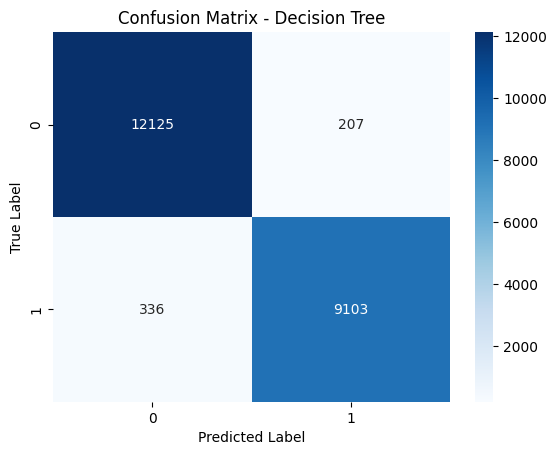

In [20]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

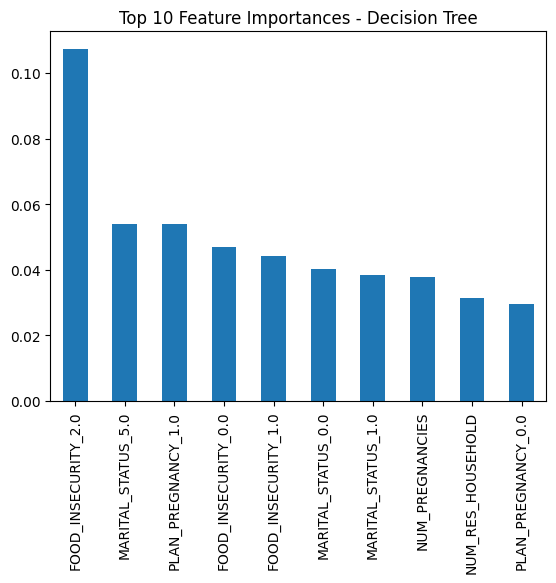

In [21]:
feature_importances_dt = pd.Series(dt_classifier.feature_importances_, index=X_train.columns)
feature_importances_dt.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances - Decision Tree')
plt.show()

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

cv_results_rf = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='f1_macro')

print(f'Average F1-Score (Random Forest): {cv_results_rf.mean()}')

Average F1-Score (Random Forest): 0.9903327442494806


In [23]:
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print('Classification Report (Random Forest):')
print(classification_report(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12332
           1       0.98      1.00      0.99      9439

    accuracy                           0.99     21771
   macro avg       0.99      0.99      0.99     21771
weighted avg       0.99      0.99      0.99     21771



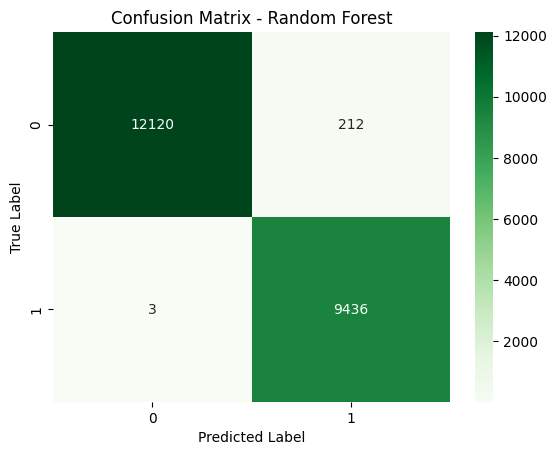

In [24]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

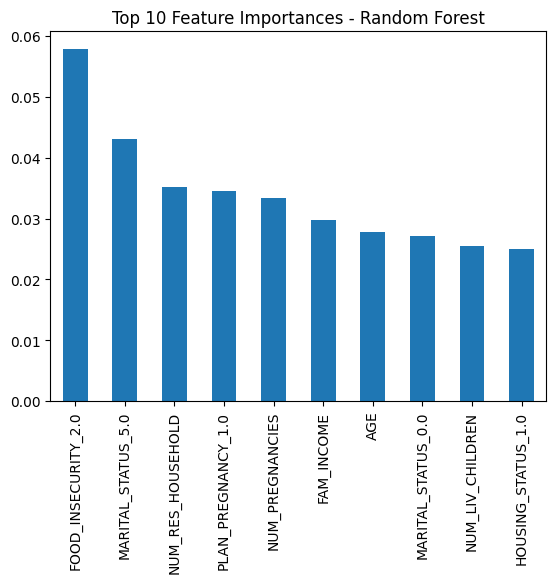

In [25]:
feature_importances_rf = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances_rf.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

In [26]:
X_reg = df_encoded.drop('AGE', axis=1)
y_reg = df_encoded['AGE']

In [27]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [28]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

cv_results_reg = cross_val_score(rf_regressor, X_train_reg, y_train_reg, cv=kfold, scoring='neg_mean_absolute_error')

print(f'Average MAE (Random Forest Regressor): {-cv_results_reg.mean()}')

Average MAE (Random Forest Regressor): 2.9031419471422524


In [29]:
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_regressor.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
mape = np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 2.8849521010623884
RMSE: 4.111473981036801
MAPE: 11.857777710933219%


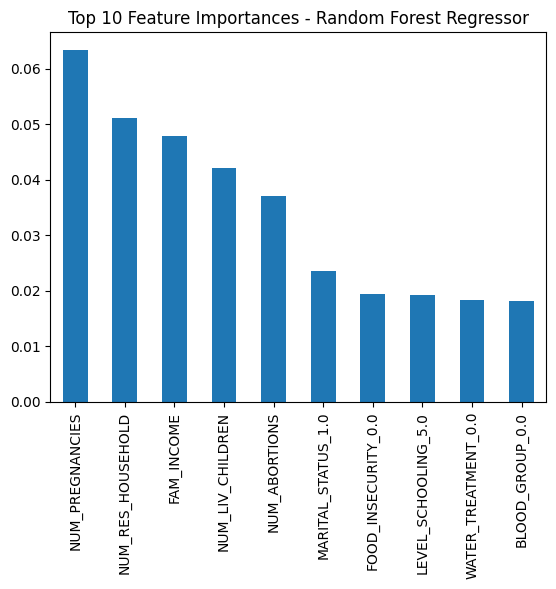

In [30]:
feature_importances_reg = pd.Series(rf_regressor.feature_importances_, index=X_train_reg.columns)
feature_importances_reg.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances - Random Forest Regressor')
plt.show()